In [1]:
from obspy import read, read_inventory
from obspy.signal import PPSD
from obspy.io.xseed import Parser
import matplotlib.pyplot as plt
import matplotlib as mtp
import numpy as np
import warnings, datetime
warnings.filterwarnings("ignore")

/Users/antonio/anaconda/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)


In [2]:
station = 'PNIG'
st  = read('2012*.IG.' + station + '.HHZ.sac')
st.merge(fill_value=0.0)
inv = read_inventory(station + '.RESP',format='RESP') 
tr  = st.select(channel="HHZ")[0]
#tr.detrend("demean")
#tr.detrend("linear")
#trf=tr.filter('bandpass', freqmin=2, freqmax=20)
ppsd = PPSD(tr.stats, metadata=inv,overlap=0.75, ppsd_length=3600.0)
#tr.plot(type='dayplot');

In [3]:
ppsd.add(tr)

True

Number of frequencies:  32768
min(f):  0.00152587890625  max(f):  50.0
Number of periods:  32768
min(T):  0.02  max(T):  655.36
Type(tp):  <class 'obspy.core.utcdatetime.UTCDateTime'>


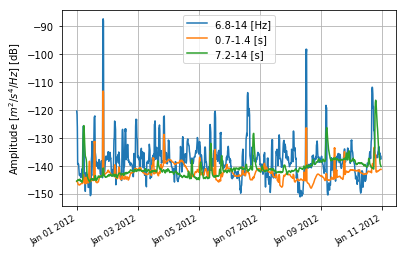

In [4]:
f  = ppsd.psd_frequencies
T  = ppsd.psd_periods
P  = ppsd.psd_values
tp = ppsd.times_processed
print('Number of frequencies: ', len(f))
print('min(f): ', np.min(f), ' max(f): ', np.max(f))
print('Number of periods: ', len(T))
print('min(T): ', np.min(T), ' max(T): ', np.max(T))
print('Type(tp): ', type(tp[0]))
#ppsd.plot_temporal([0.1])
ppsd.plot_temporal([0.1, 1, 10])


In [5]:
t0  = tp[0].matplotlib_date
tdt = [(t.matplotlib_date - t0 -5/24)*2*np.pi  for t in tp]
print('type tdt: ', type(tdt[0]))

type tdt:  <class 'float'>


psd_values[n]:  121
len(time_processed):  957
C:  121
period_bin_centers[min]:  0.02
period_bin_centers[max]:  655.36


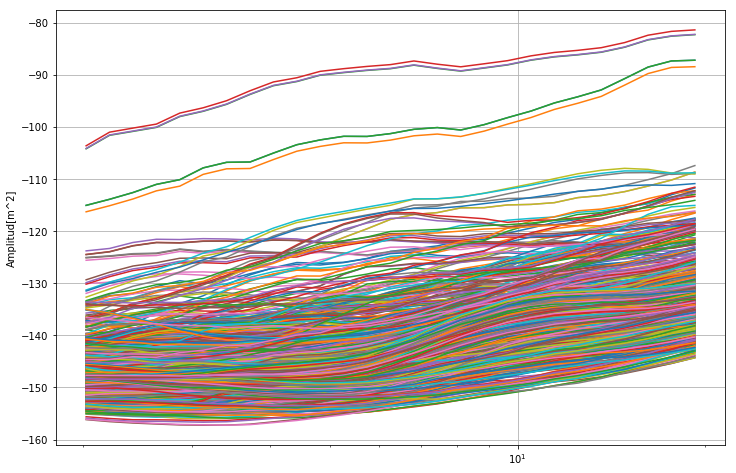

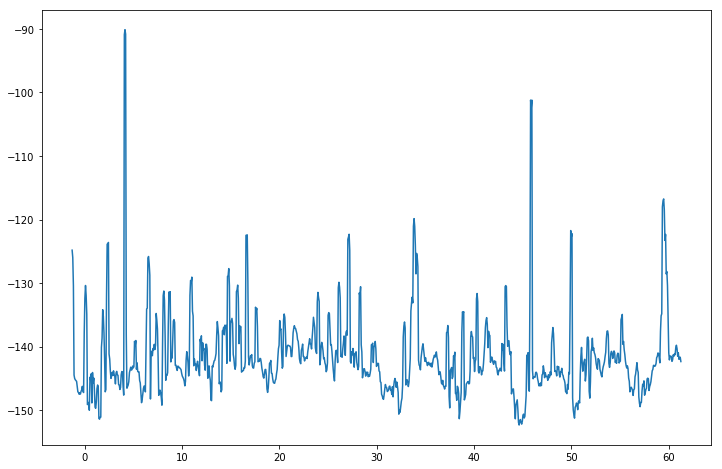

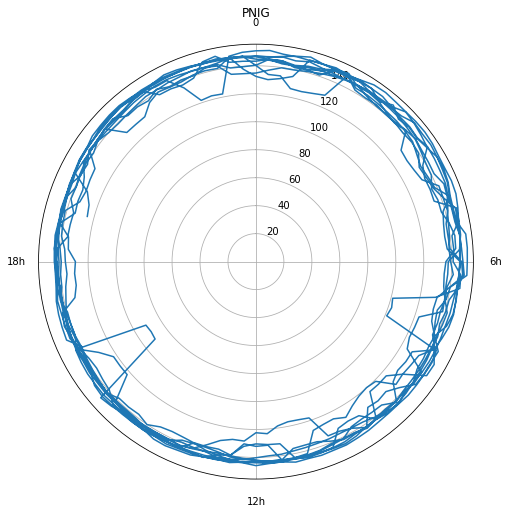

In [8]:
print('psd_values[n]: ',len(ppsd.psd_values[0]))
print('len(time_processed): ',len(tp))
print('C: ',len(ppsd.period_bin_centers))
print('period_bin_centers[min]: ', np.min(ppsd.period_bin_centers))
print('period_bin_centers[max]: ', np.max(ppsd.period_bin_centers))
fp   = 1./ppsd.period_bin_centers
ind  = np.where((fp >=2) & (fp <= 20)) 
mpsd = list() 

fig1 = plt.figure(figsize=(12,8))
ax1  = plt.subplot(111)

for psd in ppsd.psd_values:
    ax1.semilogx(fp[ind],psd[ind])
    mpsd.append(np.mean(psd[ind]))

ax1.set_ylabel('Amplitud[m^2]')
ax1.grid()
#plt.show()

fig2 = plt.figure(figsize=(12,8))
ax2  = plt.subplot(111)
ax2.plot(tdt,mpsd)
#fig2.show()

fig3 = plt.figure(figsize=(8,8))
ax3  = plt.subplot(111, projection='polar')
ax3.plot(tdt, np.abs(mpsd))
ax3.set_theta_direction(-1)
ax3.set_theta_zero_location("N")
ax3.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax3.set_xticklabels(["0", "6h", "12h", "18h"])
ax3.set_title(station)
#plt.gca().set_rticks([80, 100]) 

plt.show()

In [ ]:
print(len(ppsd.period_bin_centers))
print(len(ppsd.psd_values))
print(1./ppsd.psd_frequencies[0])
pp, am = ppsd.get_mean()
plt.plot(1./pp,am)
#plt.plot()
plt.show()